In [150]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
date_cols = ['DATE_', 'STARTDATE', "ENDDATE"]

# Setando a coluna CLIENTCODE para o tipo string, pois a mesma possuia valores misto tornando a leitura do 
# arquivo lenta já que são 600 mil linhas.
data = pd.read_csv('MarketSales.csv', parse_dates=date_cols, dtype={'CLIENTCODE': 'str'})
df = pd.DataFrame(data)

# Tratando as colunas de datas para o tipo data para manipular as mesmas, pois por algum motivo desconhecido
# as datas de STARTDATE e ENDDATE estão adiantadas por um dia comparado a coluna DATE, então eu subtraio 
# menos um dia de todas as datas de ENDDATE e STARTDATE e depois eu exporto a correção para um novo .csv.

# Vou deixar o código que fez o tratamento das datas comentado para o senhor avaliar se quiser, pois não é 
# necessário roda-lo mais.
            # datas = data[["STARTDATE","ENDDATE"]]
            # ontem = timedelta(1)
            # sub = datas - ontem

            # data3 = data[["STARTDATE", "ENDDATE"]] = sub
            # data.to_csv("MarketSales.csv")

# Renomeando e traduzindo o nome de algumas colunas para o meu melhor entendimento.
data.rename(columns={'AMOUNT': 'QUANTIDADE', 'BRANCHNR': 'FILIALNR', 'DATE_': 'DATE',
'BRANCH': 'FILIAL', 'SALESMAN': 'VENDEDOR', 'BRANDCODE': 'MARCA_CODE', 'BRAND': 'MARCA'}, inplace = True)

# OBSERVAÇÃO: COLUNA GENDER - E: HOMEM/HOMENS, K: MULHER/MULHERES.

In [223]:
# Traduzindo algumas linhas das colunas CATEGORY_NAME1, CATEGORY_NAME2 e CATEGORY_NAME3 para o melhor
# entendimento do dataset.
data['CATEGORY_NAME1'] = data['CATEGORY_NAME1'].map({'GIDA':'CASA',
                             'MEYVE SEBZE':'FRUTAS E VEGETAIS',
                             'SÜT KAHVALTILIK':'LEITE CAFÉ DA MANHÃ',
                             'İÇECEK':'BEBER',
                             'DETERJAN TEMİZLİK':'DETERGENTE DE LIMPEZA',
                             'KAĞIT':'PAPEL',
                             'KOZMETİK':'COSMÉTICO',
                             'SİGARA':'CIGARRO',
                             'EV':'LAR',
                             'BEBEK':'BEBÊ',
                             'EV':'LAR',
                             'PET':'PETs'})

data['CATEGORY_NAME2']= data['CATEGORY_NAME2'].replace(['BÜSKİVİ ÇEREZ','SEBZE','ÇİKOLATA GOFRET',
'ÇAY KAHVE',
'UNLU MAMÜLLER',
'TERLİK',
'KEDİ MAMALARI',
'KUŞ MAMALARI',
'KÖPEK MAMALARI',
'YÜZ BAKIMI',
'MEYVE',
'BAKLİYAT',
'PEYNİR',
'SÜT',
'MAKARNA',
'SU MADENSUYU',
'HAZIR YEMEKLER',
'GAZSIZ İÇECEK',
'KAHVALTILIK',
'TEREYAĞ MARGARİN',
'MUTFAK EŞYA GEREÇLERİ',
'YOĞURT',
'YUMURTA'],['BISCOITOS','VEGETAL','BOLACHA DE CHOCOLATE',
'CHÁ CAFÉ',
'PRODUTOS DE CONFEITARIA',
'CHINELO',
'ALIMENTOS PARA GATOS',
'ALIMENTOS PARA PÁSSAROS',
'ALIMENTOS PARA CÃES',
'CUIDADOS COM O ROSTO',
'FRUTA',
'LEGUMES',
'QUEIJO',
'LEITE',
'MASSA',
'Agua Mineral',
'COMIDA PRONTA',
'refrigerante',
'CAFÉ DA MANHÃ',
'MANTEIGA MARGARINA',
'EQUIPAMENTO DE COZINHA',
'IOGURTE',
'OVOS'])

data['CATEGORY_NAME3']= data['CATEGORY_NAME3'].replace(['BÜSKİVİ','AÇIK BAKLİYAT','EKMEK',
'PASTÖRİZE SÜT',
'MAKARNA',
'MAKYAJ PAMUK',
'YEŞİL ZEYTİN',
'LOSYON VE SÜTLER',
'LOSYON SÜTLER',
'YÜZ TEMİZLEME ÜRÜNLERİ',
'SU',
'KURUYEMİŞ',
'KEK',
'KAHVE',
'SEKER TATLANDIRICI',
'ÇAY',
'MEYVE SUYU',
'BEYAZ PEYNİR',
'YOĞURTLAR',
'COLA',
'MARGARİNLER',
'CİPS',
'PİLİÇ'],['BISCOITOS','VEGETAL','BOLACHA DE CHOCOLATE',
'CHÁ CAFÉ',
'PRODUTOS DE CONFEITARIA',
'CHINELO',
'ALIMENTOS PARA GATOS',
'ALIMENTOS PARA PÁSSAROS',
'ALIMENTOS PARA CÃES',
'CUIDADOS COM O ROSTO',
'FRUTA',
'LEGUMES',
'QUEIJO',
'LEITE',
'MASSA',
'Agua Mineral',
'COMIDA PRONTA',
'refrigerante',
'CAFÉ DA MANHÃ',
'MANTEIGA MARGARINA',
'EQUIPAMENTO DE COZINHA',
'IOGURTE',
'OVOS'])

# Média dos valores da coluna "Quantidade"

In [107]:
media_quantidade = df['QUANTIDADE'].mean()
media_quantidade

1.27020400519058

# Mediana dos valores da coluna "Quantidade"

In [108]:
mediana_quantidade = df['QUANTIDADE'].median()
mediana_quantidade

1.0

# Moda dos valores da coluna "Quantidade"

In [109]:
moda_quantidade = df['QUANTIDADE'].mode()
moda_quantidade

0    1.0
Name: QUANTIDADE, dtype: float64

# Variância dos valores da coluna "Quantidade"

In [110]:
quantidade_coluna = data['QUANTIDADE']
variancia_quantidade = np.var(quantidade_coluna)
variancia_quantidade

3.9812202739321867

# Desvio Padrão dos valores da coluna "Quantidade"

In [111]:
desvio_padrao_quantidade = quantidade_coluna.std()
desvio_padrao_quantidade

1.9953011774443372

# Gráfico Boxplot da coluna "Quantidade"

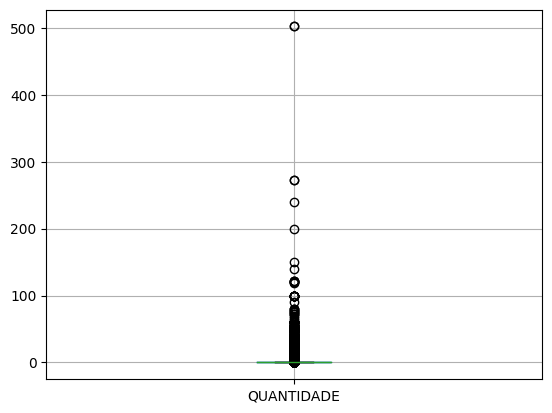

In [154]:
boxplot_quantidade = df.boxplot(column =['QUANTIDADE'])
plt.show()

# Média dos valores da coluna "PRICE"

In [277]:
media_price = df['PRICE'].mean()
media_price

3.959574264408688

# Mediana dos valores da coluna "PRICE"

In [278]:
mediana_price = df['PRICE'].median()
mediana_price

2.3

# Moda dos valores da coluna "PRICE"

In [279]:
moda_price = df['PRICE'].mode()
moda_price

0    1.0
Name: PRICE, dtype: float64

# Variância dos valores da coluna "PRICE"

In [280]:
price_coluna = data['PRICE']
variancia_price = np.var(price_coluna)
variancia_price

44.663701965345446

# Desvio Padrão dos valores da coluna "PRICE"

In [281]:
desvio_padrao_price = price_coluna.std()
desvio_padrao_price

6.683096217473939

# Gráfico Boxplot da coluna "PRICE"

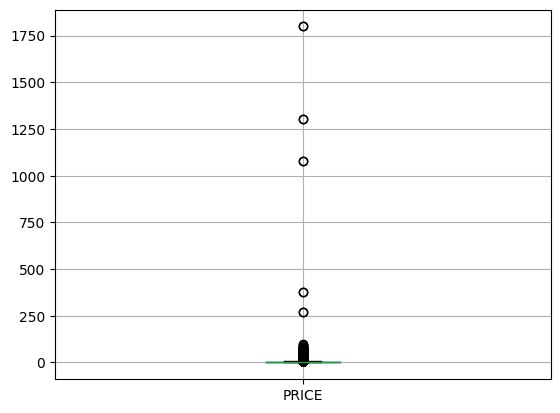

In [161]:
boxplot_price = df.boxplot(column =['PRICE'])
plt.show()

# Média dos valores da coluna "LINENETTOTAL"

In [282]:
media_LINENETTOTAL = df['LINENETTOTAL'].mean()
media_LINENETTOTAL

4.055741204077189

# Mediana dos valores da coluna "LINENETTOTAL"

In [283]:
mediana_LINENETTOTAL = df['LINENETTOTAL'].median()
mediana_LINENETTOTAL

2.43

# Moda dos valores da coluna "LINENETTOTAL"

In [284]:
moda_LINENETTOTAL = df['LINENETTOTAL'].mode()
moda_LINENETTOTAL

0    1.0
Name: LINENETTOTAL, dtype: float64

# Variância dos valores da coluna "LINENETTOTAL"

In [285]:
LINENETTOTAL_coluna = data['LINENETTOTAL']
variancia_LINENETTOTAL = np.var(LINENETTOTAL_coluna)
variancia_LINENETTOTAL

142.94750187110097

# Desvio Padrão dos valores da coluna "LINENETTOTAL"

In [286]:
desvio_padrao_LINENETTOTAL = LINENETTOTAL_coluna.std()
desvio_padrao_LINENETTOTAL

11.956075266873798

# Gráfico Boxplot da coluna "LINENETTOTAL"

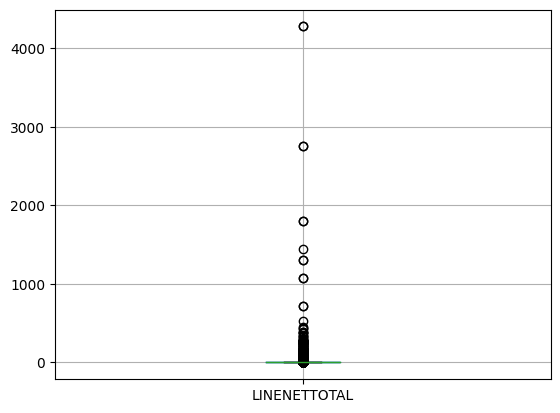

In [157]:
boxplot_LINENETTOTAL = df.boxplot(column =['LINENETTOTAL'])
plt.show()

# Média dos valores da coluna "LINENET"

In [287]:
media_LINENET = df['LINENET'].mean()
media_LINENET

3.7353451359581875

# Mediana dos valores da coluna "LINENET"

In [288]:
mediana_LINENET = df['LINENET'].median()
mediana_LINENET

2.22

# Moda dos valores da coluna "LINENET"

In [289]:
moda_LINENET = df['LINENET'].mode()
moda_LINENET

0    0.93
Name: LINENET, dtype: float64

# Variância dos valores da coluna "LINENET"

In [290]:
LINENET_coluna = data['LINENET']
variancia_LINENET = np.var(LINENET_coluna)
variancia_LINENET

117.02198051418269

# Desvio Padrão dos valores da coluna "LINENET"

In [291]:
desvio_padrao_LINENET = LINENET_coluna.std()
desvio_padrao_LINENET

10.817678679194433

# Gráfico Boxplot da coluna "LINENET"

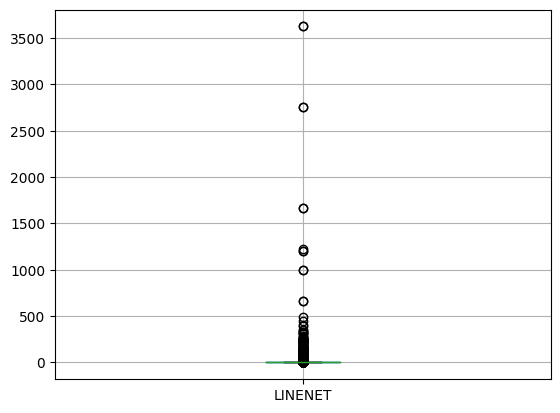

In [158]:
boxplot_LINENET = df.boxplot(column =['LINENET'])
plt.show()

# Moda dos valores da coluna "ITEMNAME"

# PERGUNTA 1 - RESPOSTA:

## Qual o produto mais vendido pelo supermercado?

In [292]:
# Aqui estar comprovado qual é o item/produto mais vendido que é "Pão" traduzido da palavra turca "EKMEK".
moda_ITEMNAME = df['ITEMNAME'].mode()
moda_ITEMNAME

0    EKMEK 250 GR
Name: ITEMNAME, dtype: object

# Moda dos valores da coluna "DATE"

In [293]:
# Aqui estar comprovado qual é a data onde ocorreu mais vendas no dataset, ou seja, a data que mais aparece.
moda_DATE = df['DATE'].mode()
moda_DATE

0   2017-01-17
Name: DATE, dtype: datetime64[ns]

# Moda dos valores da coluna "FILIAL"

In [294]:
# Aqui estar comprovado qual é a filial do supermercado turco que mais vendeu, pois é a que mais aparece no
# dataset e que se chama Filial de Istambul traduzido do turco: İstanbul Subesi.
moda_FILIAL = df['FILIAL'].mode()
moda_FILIAL

0    İstanbul Subesi
Name: FILIAL, dtype: object

# Moda dos valores da coluna "VENDEDOR"

In [295]:
# Aqui estar comprovado qual é o vendedor que mais vendeu no supermercado turco que se chama "Yunus Emre AVUZ",
# pois é o vendedor que mais
# aparece no dataset, já que a cada venda feita dele, gera uma linha no dataset.

#  VERIFICAR SE O VENDEDOR QUE MAIS VENDEU, TAMBEM PERTENCE A FILIAL QUE MAIS VENDEU, A CIDADE QUE MAIS VENDEU
# A REGIAO QUE MAIS VENDEU, SE ESTA VINCULADO AO CLIENTE QUE MAIS COMPROU, A MARCA QUE MAIS VENDEU, AS
# CATEGORIAS, SE ESTA VINCULADO MAIS PARA HOMENS OU MULHERES, SE ELE VENDEU TAMBEM NA DATA QUE MAIS VENDEU E NO
# HORARIO QUE MAIS VENDEU, SE ESTA VINCULADO AO ITEM QUE MAIS VENDEU, A QUANTIDADE MAIS VENDIDA TAMBEM E SE 
# FOI ELE QUE FEZ AS VENDAS DE MAIORES PREÇOS.
moda_VENDEDOR = df['VENDEDOR'].mode()
moda_VENDEDOR

0    Yunus Emre AVUZ
Name: VENDEDOR, dtype: object

# Moda dos valores da coluna "CITY"

In [296]:
# Aqui estar comprovado qual a cidade em que o supermercado turco mais vendeu e ela se chama "İstanbul" e
# também percebe-se que a filial que mais vendeu (Filial de Istambul - İstanbul Subesi), se encontra na cidade
# que mais vendeu.
moda_CITY = df['CITY'].mode()
moda_CITY

0    İstanbul
Name: CITY, dtype: object

# Moda dos valores da coluna "REGION"

In [297]:
# Aqui estar comprovado qual a região onde o supermercado turco mais vendeu que se chama "Marmara".
moda_REGION = df['REGION'].mode()
moda_REGION

0    Marmara
Name: REGION, dtype: object

# Moda dos valores da coluna "CLIENTNAME"

In [298]:
# Aqui estar comprovado qual o cliente que mais comprou no supermercado turco que tem o nome "Nihat ÖNAL", pois
#  é o nome que mais aparece em linhas de vendas do dataset.
moda_CLIENTNAME = df['CLIENTNAME'].mode()
moda_CLIENTNAME

0    Nihat ÖNAL
Name: CLIENTNAME, dtype: object

# Moda dos valores da coluna "MARCA"

In [299]:
# Aqui estar comprovado qual a marca de produtos que é mais vendida no supermercado turco que se chama "HAL".
moda_MARCA = df['MARCA'].mode()
moda_MARCA

0    HAL
Name: MARCA, dtype: object

# Moda dos valores da coluna "CATEGORY_NAME1"

In [300]:
# Aqui estar comprovado qual a categoria de nome1/tipo1 onde ocorreu mais vendas no supermercado que é a
# categoria casa.
moda_CATEGORY_NAME1 = df['CATEGORY_NAME1'].mode()
moda_CATEGORY_NAME1

0    CASA
Name: CATEGORY_NAME1, dtype: object

# Moda dos valores da coluna "CATEGORY_NAME2"

In [301]:
# Aqui estar comprovado qual a categoria de nome2/tipo2 onde ocorreu mais vendas no supermercado que é a
# categoria biscoitos.
moda_CATEGORY_NAME2 = df['CATEGORY_NAME2'].mode()
moda_CATEGORY_NAME2

0    BISCOITOS
Name: CATEGORY_NAME2, dtype: object

# Moda dos valores da coluna "STARTDATE"

In [302]:
# Aqui estar comprovado qual o horário onde ocorreu mais vendas no supermercado que foi as quatro horas e 
# quarenta e dois minutos que por coincidencia também foi na data mais vendida pelo supermercado, é possível
# analisar o horário nesta coluna, pois na coluna date tem apenas as datas, já nas colunas STARTDATE E ENDDATE
# temos as datas e os horários juntamente.
moda_STARTDATE = df['STARTDATE'].mode()
moda_STARTDATE

0   2017-01-17 16:42:35
Name: STARTDATE, dtype: datetime64[ns]

# Moda dos valores da coluna "GENDER"

# PERGUNTA 2 - RESPOSTA:

## São os homens ou as mulheres que mais compram no supermercado?

In [303]:
# OBSERVAÇÃO: COLUNA GENDER - E: HOMEM/HOMENS, K: MULHER/MULHERES, pois homem em turco se chama "erkekler".
# Aqui estar comprovado que são as mulheres que mais compram no supermercado turco, pois a letra "K" se refere
# as mulheres no dataset e é genero que mais se encontra nos dados.
moda_GENDER = df['GENDER'].mode()
moda_GENDER

0    K
Name: GENDER, dtype: object

# Moda dos valores da coluna "CATEGORY_NAME3"

In [304]:
# Aqui estar comprovado qual a categoria de nome3/tipo3 onde ocorreu mais vendas no supermercado que é a
# categoria biscoitos por coincidencia também, pois as palavras são sinonimos.
moda_CATEGORY_NAME3 = df['CATEGORY_NAME3'].mode()
moda_CATEGORY_NAME3

0    BISCOITOS
Name: CATEGORY_NAME3, dtype: object

# Visualização dos Dados

In [314]:
data_minimal = pd.read_csv('MarketSales.csv', parse_dates=date_cols, dtype={'CLIENTCODE': 'str'}, nrows=350000)
data_minimal.rename(columns={'AMOUNT': 'QUANTIDADE', 'BRANCHNR': 'FILIALNR', 'DATE_': 'DATE',
'BRANCH': 'FILIAL', 'SALESMAN': 'VENDEDOR', 'BRANDCODE': 'MARCA_CODE', 'BRAND': 'MARCA'}, inplace = True)
# Traduzindo algumas linhas das colunas CATEGORY_NAME1, CATEGORY_NAME2 e CATEGORY_NAME3 para o melhor
# entendimento do dataset.
data_minimal['CATEGORY_NAME1'] = data_minimal['CATEGORY_NAME1'].map({'GIDA':'CASA',
                             'MEYVE SEBZE':'FRUTAS E VEGETAIS',
                             'SÜT KAHVALTILIK':'LEITE CAFÉ DA MANHÃ',
                             'İÇECEK':'BEBER',
                             'DETERJAN TEMİZLİK':'DETERGENTE DE LIMPEZA',
                             'KAĞIT':'PAPEL',
                             'KOZMETİK':'COSMÉTICO',
                             'SİGARA':'CIGARRO',
                             'EV':'LAR',
                             'BEBEK':'BEBÊ',
                             'EV':'LAR',
                             'PET':'PETs'})

data_minimal['CATEGORY_NAME2']= data_minimal['CATEGORY_NAME2'].replace(['BÜSKİVİ ÇEREZ','SEBZE','ÇİKOLATA GOFRET',
'ÇAY KAHVE',
'UNLU MAMÜLLER',
'TERLİK',
'KEDİ MAMALARI',
'KUŞ MAMALARI',
'KÖPEK MAMALARI',
'YÜZ BAKIMI',
'MEYVE',
'BAKLİYAT',
'PEYNİR',
'SÜT',
'MAKARNA',
'SU MADENSUYU',
'HAZIR YEMEKLER',
'GAZSIZ İÇECEK',
'KAHVALTILIK',
'TEREYAĞ MARGARİN',
'MUTFAK EŞYA GEREÇLERİ',
'YOĞURT',
'YUMURTA'],['BISCOITOS','VEGETAL','BOLACHA DE CHOCOLATE',
'CHÁ CAFÉ',
'PRODUTOS DE CONFEITARIA',
'CHINELO',
'ALIMENTOS PARA GATOS',
'ALIMENTOS PARA PÁSSAROS',
'ALIMENTOS PARA CÃES',
'CUIDADOS COM O ROSTO',
'FRUTA',
'LEGUMES',
'QUEIJO',
'LEITE',
'MASSA',
'Agua Mineral',
'COMIDA PRONTA',
'refrigerante',
'CAFÉ DA MANHÃ',
'MANTEIGA MARGARINA',
'EQUIPAMENTO DE COZINHA',
'IOGURTE',
'OVOS'])

data_minimal['CATEGORY_NAME3']= data_minimal['CATEGORY_NAME3'].replace(['BÜSKİVİ','AÇIK BAKLİYAT','EKMEK',
'PASTÖRİZE SÜT',
'MAKARNA',
'MAKYAJ PAMUK',
'YEŞİL ZEYTİN',
'LOSYON VE SÜTLER',
'LOSYON SÜTLER',
'YÜZ TEMİZLEME ÜRÜNLERİ',
'SU',
'KURUYEMİŞ',
'KEK',
'KAHVE',
'SEKER TATLANDIRICI',
'ÇAY',
'MEYVE SUYU',
'BEYAZ PEYNİR',
'YOĞURTLAR',
'COLA',
'MARGARİNLER',
'CİPS',
'PİLİÇ'],['BISCOITOS','VEGETAL','BOLACHA DE CHOCOLATE',
'CHÁ CAFÉ',
'PRODUTOS DE CONFEITARIA',
'CHINELO',
'ALIMENTOS PARA GATOS',
'ALIMENTOS PARA PÁSSAROS',
'ALIMENTOS PARA CÃES',
'CUIDADOS COM O ROSTO',
'FRUTA',
'LEGUMES',
'QUEIJO',
'LEITE',
'MASSA',
'Agua Mineral',
'COMIDA PRONTA',
'refrigerante',
'CAFÉ DA MANHÃ',
'MANTEIGA MARGARINA',
'EQUIPAMENTO DE COZINHA',
'IOGURTE',
'OVOS'])

In [315]:
data_minimal.to_csv("MarketSale_reduzido.csv")

# Quantidade de produtos vendidos em diferentes linhas de produtos

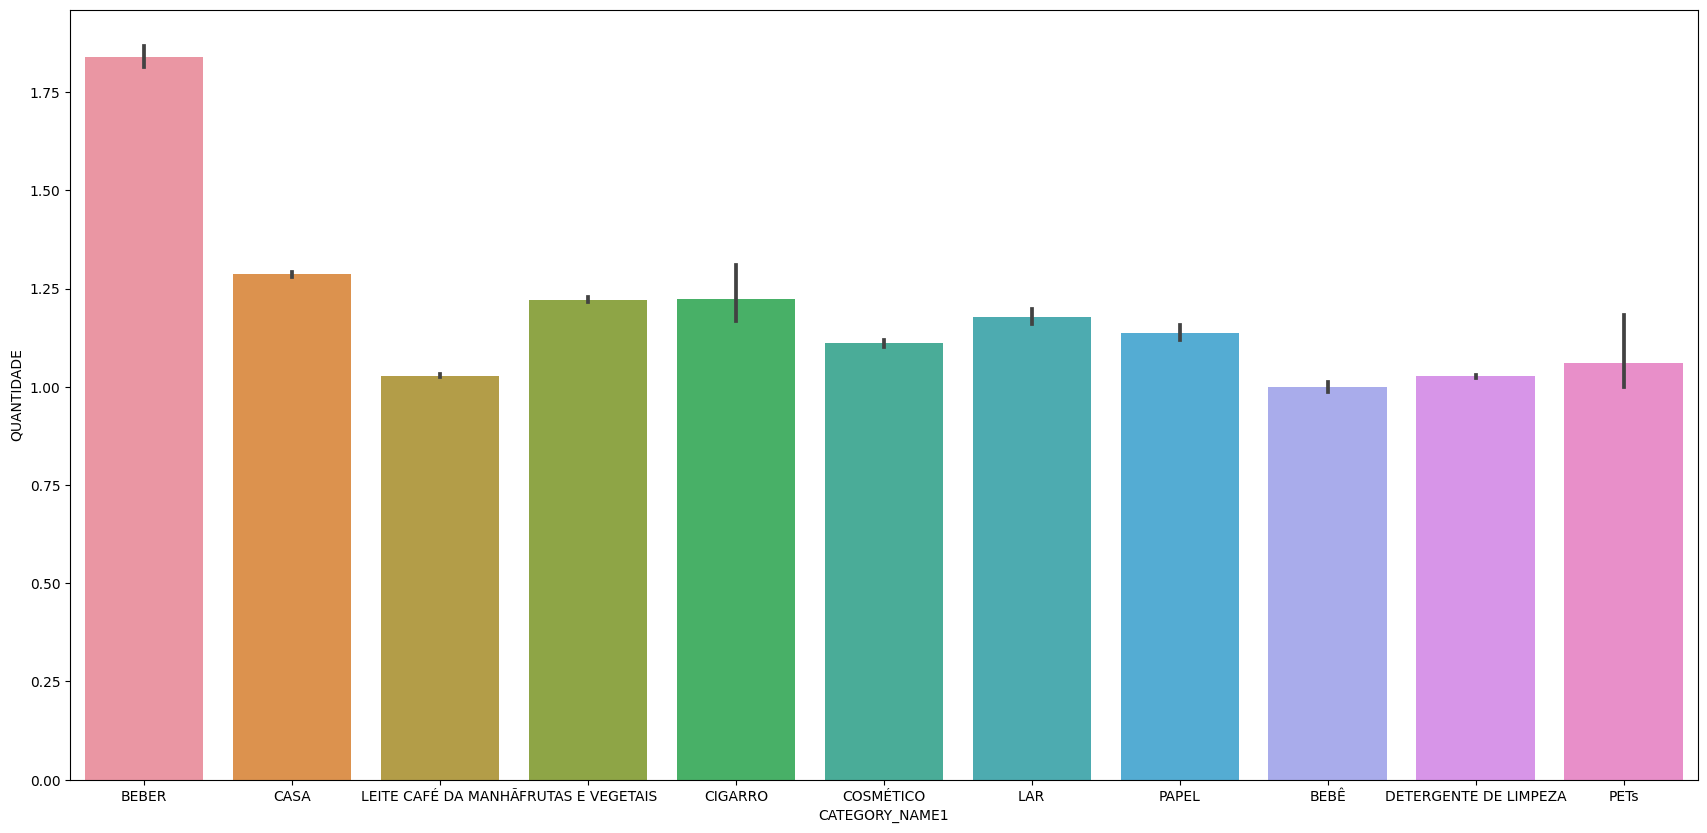

In [224]:
barplot_CATEGORY_NAME1_quantidade = sns.barplot(data=data, x="CATEGORY_NAME1", y="QUANTIDADE")
barplot_CATEGORY_NAME1_quantidade.figure.set_size_inches(21,10)
plt.show()

# Quantidade de produtos vendidos em diferentes linhas de produtos, usando boxenplot

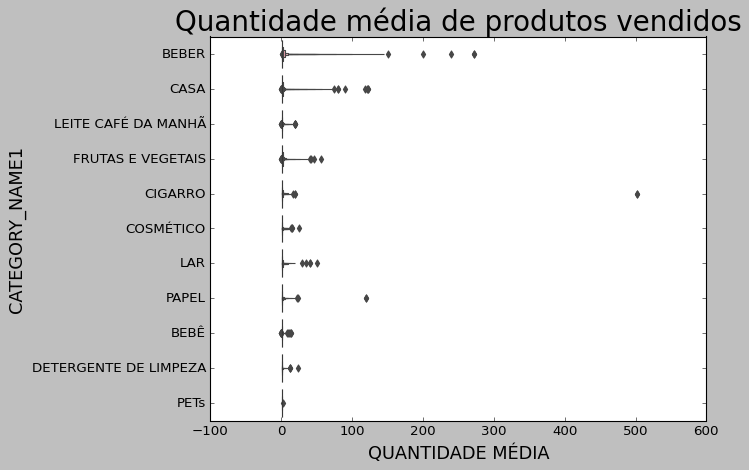

In [268]:
boxenplot_CATEGORY_NAME1_quantidade = sns.boxenplot(x = "QUANTIDADE", y = "CATEGORY_NAME1", data = data)
boxenplot_CATEGORY_NAME1_quantidade.set_title(label = "Quantidade média de produtos vendidos", fontsize = 25)
boxenplot_CATEGORY_NAME1_quantidade.set_xlabel(xlabel = "QUANTIDADE MÉDIA",fontsize = 16)
boxenplot_CATEGORY_NAME1_quantidade.set_ylabel(ylabel = "CATEGORY_NAME1", fontsize = 16)
plt.show()

# Contagem de vendas de produtos

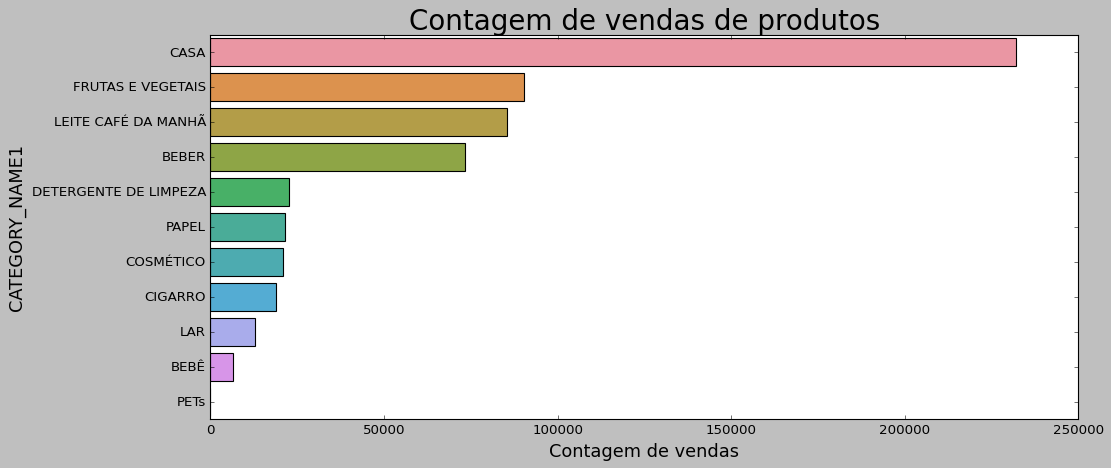

In [263]:
plt.figure(figsize=(14,6))
ax1 = sns.countplot(y='CATEGORY_NAME1', data=data, order = data['CATEGORY_NAME1'].value_counts().index)
ax1.set_title(label = "Contagem de vendas de produtos", fontsize = 25)
ax1.set_xlabel(xlabel = "Contagem de vendas", fontsize = 16)
ax1.set_ylabel(ylabel= "CATEGORY_NAME1", fontsize = 16)
plt.show()

# PERGUNTA 3 - RESPOSTA:

## Existe algum período onde o supermercado mais vende?

# Vendas de produtos por hora

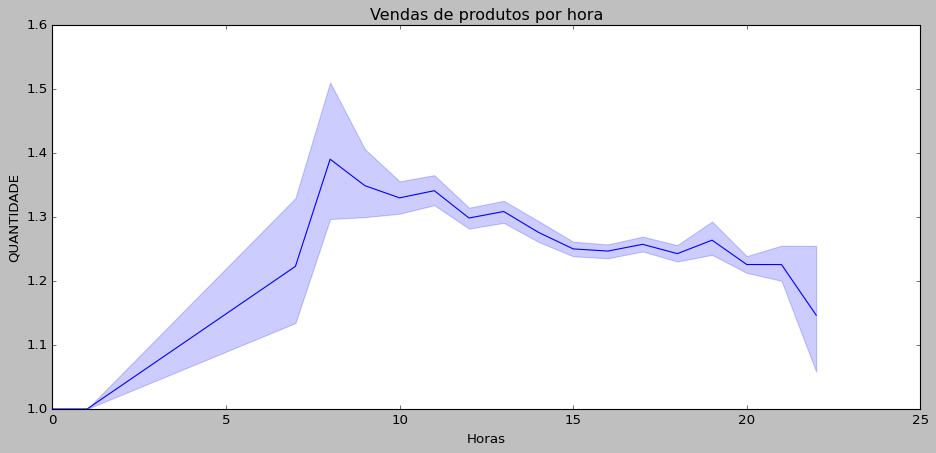

In [233]:
data["STARTDATE"]= pd.to_datetime(data["STARTDATE"])
data["Horas"]= (data["STARTDATE"]).dt.hour
plt.figure(figsize=(14,6))
plt.style.use('classic')
SalesTime = sns.lineplot(x="Horas", y ="QUANTIDADE", data = data).set_title("Vendas de produtos por hora")
plt.show()

# PERGUNTA 2 - RESPOSTA:

# Analisando se são as mulheres ou os homens que mais compram em quantidade.

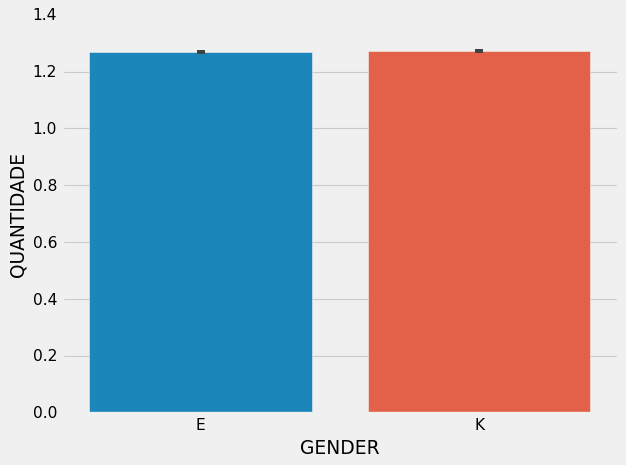

In [255]:
barplot_gender_quantidade = sns.barplot(data=data, x="GENDER", y="QUANTIDADE")
plt.show()barplot_gender_quantidade = sns.barplot(data=data, x="GENDER", y="QUANTIDADE")
plt.show()

# PERGUNTA 2 - RESPOSTA:

# Analisando se são as mulheres ou os homens que mais gastam em relação ao preço dos produtos.

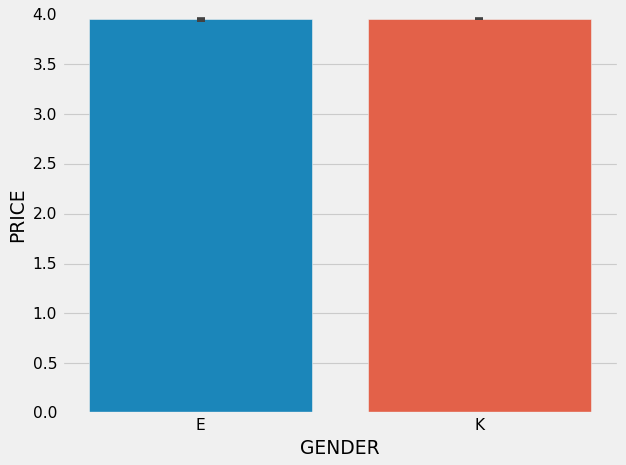

In [256]:
barplot_gender_quantidade = sns.barplot(data=data, x="GENDER", y="PRICE")
plt.show()

# Vendas de produtos com base no sexo

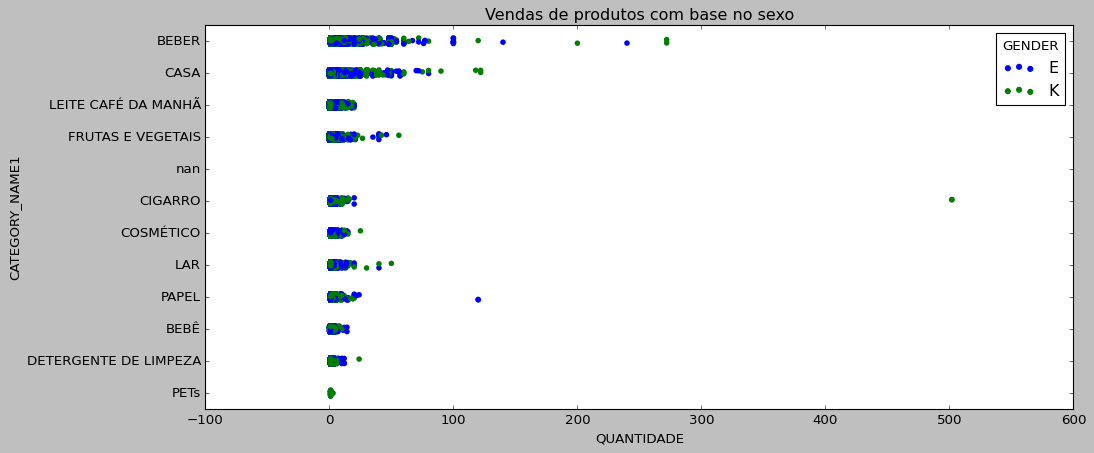

In [259]:
plt.style.use('classic')
plt.figure(figsize = (14,6))
ax= sns.stripplot(y= "CATEGORY_NAME1", x = "QUANTIDADE", hue = "GENDER", data = data)
ax.set_title(label = "Vendas de produtos com base no sexo")
ax.set_xlabel(xlabel = "QUANTIDADE")
ax.set_ylabel(ylabel = "CATEGORY_NAME1")
plt.show()

# Correlação entre as variáveis "PRICE" e "LINENETTOTAL"

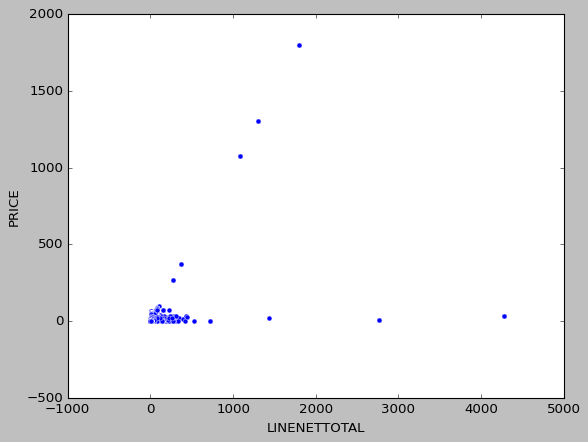

In [272]:
sns.scatterplot(data=data, x="LINENETTOTAL", y="PRICE")
plt.show()

In [276]:
df

,Unnamed: 0,ID,ITEMCODE,ITEMNAME,FICHENO,DATE,QUANTIDADE,PRICE,LINENETTOTAL,LINENET,...,CLIENTNAME,MARCA_CODE,MARCA,CATEGORY_NAME1,CATEGORY_NAME2,CATEGORY_NAME3,STARTDATE,ENDDATE,GENDER,Horas
0,0,11738.0,5863.0,SPRITE 1 LT LIMON AROMALI GAZOZ,18456,2017-01-07,1.0,2.00,2.00,1.85,...,Sercan KIZILOK,156,SPRİTE,BEBER,GAZLI İÇECEK,GAZOZ,2017-01-07 16:16:11,2017-01-07 16:17:13,E,16
1,1,10537.0,8.0,TOZ SEKER,18105,2017-01-06,5.0,2.65,13.25,12.27,...,İsmet ŞINGIR,NaN,NaN,BEBER,CHÁ CAFÉ,MASSA,2017-01-06 11:04:34,2017-01-06 11:05:37,E,11
2,2,11335.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,...,Yağız KUBAL,300,FALIM,CASA,SAKIZ SEKERLEME,SAKIZ,2017-01-03 14:00:03,2017-01-03 14:01:01,E,14
3,3,11336.0,5979.0,FALIM SAKIZ 5LI NANE,18350,2017-01-03,1.0,0.40,0.40,0.37,...,Yağız KUBAL,300,FALIM,CASA,SAKIZ SEKERLEME,SAKIZ,2017-01-03 14:00:03,2017-01-03 14:01:01,E,14
4,4,10115.0,12808.0,FALIM SAKIZ 5LI CILEK,18005,2017-01-05,1.0,0.40,0.40,0.37,...,Habibe AYSAN,300,FALIM,CASA,SAKIZ SEKERLEME,SAKIZ,2017-01-05 14:00:30,2017-01-05 14:01:03,K,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611103,611103,511703.0,7.0,EKMEK 250 GR,134656,2017-03-18,1.0,0.90,0.90,0.89,...,Mahmut BAYATGİL,NaN,NaN,CASA,PRODUTOS DE CONFEITARIA,BOLACHA DE CHOCOLATE,2017-03-18 09:39:54,2017-03-18 09:40:50,E,9
611104,611104,511496.0,7.0,EKMEK 250 GR,134630,2017-03-18,1.0,0.90,0.90,0.89,...,Gamze BOTUÇ,NaN,NaN,CASA,PRODUTOS DE CONFEITARIA,BOLACHA DE CHOCOLATE,2017-03-18 20:30:58,2017-03-18 20:31:17,K,20
611105,611105,492612.0,7.0,EKMEK 250 GR,130100,2017-03-15,1.0,0.90,0.90,0.89,...,Cengiz BEREKETÇİ,NaN,NaN,CASA,PRODUTOS DE CONFEITARIA,BOLACHA DE CHOCOLATE,2017-03-15 17:51:04,2017-03-15 17:51:18,E,17
611106,611106,512343.0,7.0,EKMEK 250 GR,134762,2017-03-18,1.0,0.90,0.90,0.88,...,Elifnur EGİNKAYA,NaN,NaN,CASA,PRODUTOS DE CONFEITARIA,BOLACHA DE CHOCOLATE,2017-03-18 17:00:12,2017-03-18 17:01:20,K,17
